In [10]:
# Setup directories for Google Colab
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')
%cd MLexercise_CarDimensions

import glob
import re
import pandas as pd

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

file_paths = glob.glob("results/weight_prediction*.csv")
# file_paths.sort(key=lambda x: int(re.search(r'\d+', x).group()))
file_paths = file_paths[::-1]
print(file_paths)

dataframes = [pd.read_csv(path, encoding='ISO-8859-1') for path in file_paths]


/content/drive/MyDrive/Colab Notebooks/MLexercise_CarDimensions
['results/weight_prediction_PyTorch.csv', 'results/weight_prediction_TF.csv', 'results/weight_prediction_sklearn.csv']


In [11]:
dataframes[1]
# dataframes[0]['Actual']

,Actual,Predicted,Error,Error %
0,1114.0,1345.4541,231.454102,20.776849
1,2255.0,2274.2695,19.269531,0.854525
2,2255.0,2356.2598,101.259766,4.490455
3,2327.0,2274.2695,-52.730469,2.266028
4,2327.0,2356.2598,29.259766,1.257403
...,...,...,...,...
3759,1610.0,1520.1940,-89.806030,5.578014
3760,1585.0,1520.1940,-64.806030,4.088709
3761,1590.0,1520.1940,-69.806030,4.390316
3762,2064.0,2013.7972,-50.202759,2.432304


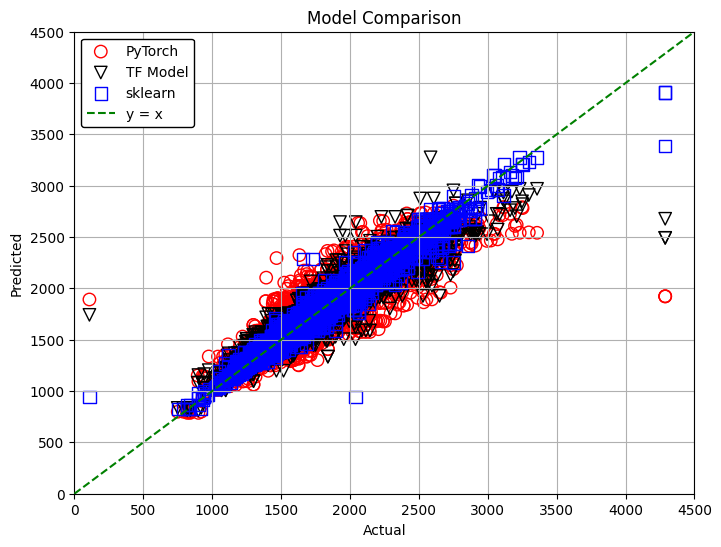

In [12]:
from notebooks.utils import plot_scatter_comparison

plot_scatter_comparison(
    dfs=dataframes,
    labels=["PyTorch", "TF Model", "sklearn"],
    x_col="Actual", y_col="Predicted",
    xlabel="Actual",
    ylabel="Predicted",
    title="Model Comparison",
    xrange=[0, 4500],
    yrange=[0, 4500],
    # xrange=None,
    # yrange=None,
    drawline=True
)

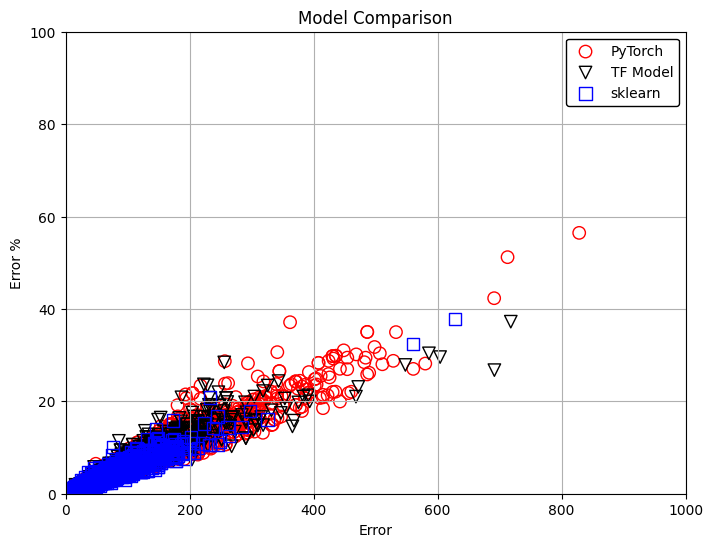

In [13]:
plot_scatter_comparison(
    dfs=dataframes,
    labels=["PyTorch", "TF Model", "sklearn"],
    x_col="Error", y_col="Error %",
    xlabel="Error",
    ylabel="Error %",
    title="Model Comparison",
    xrange=[0, 1000],
    yrange=[0, 100]
)

(0.0, 1000000.0)

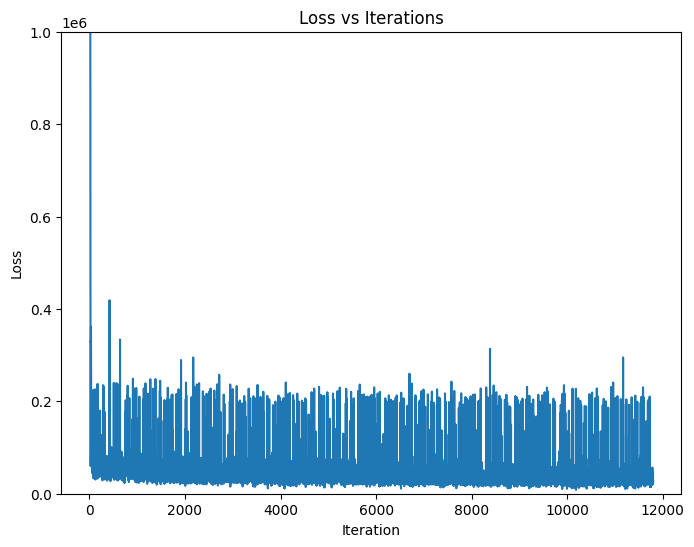

In [21]:
log = pd.read_csv("results/learning_log_PyTorch.csv")

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(log['loss_history'])
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss vs Iterations")
plt.ylim(0, 1000000)